## EDA Project data set
> laura van de Baan 

In [1]:
import pandas as pd
import polars as pl 
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

pd.set_option("display.max_columns", None)

In [2]:
#import data

path = r"C:\Users\laura\Documents\DSTI\Courses\Machine learning python labs\Project 1\cybersecurity_attacks.csv"
df = pd.read_csv(path)

In [ ]:
df.head()

In [4]:
#profile report

profile = ProfileReport(df, title = "Cyber Security Attack Type Detection")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The profile report indicates that there are three different kinds of attacks: DDoS, Malware and Intrusion. Furthermore, approximately half of the data has a malware indicator, and approximately half the data has an alert. <br> The source IP address is a unique variable as is the destination IP address. 
<br>There are no correlations between the variables. 
<br>Alerts are something that are triggered by the attack, it is assumable that this variable cannot be used to predict the attack type as they arrive after the attack is deployed
<br>The same can be said for the action taken after the attack

In [ ]:
df["Payload Data"].value_counts()

in context of cybersecurity data payload is related to the transport of data across a network. Malware payload refers to malicious code (source: A. Froelich, October 2021 on techtarget). 
<br>The variable in the dataset contains only latin phrases which are translatable but do not make much sense in the context of cybersecurity.
<br>There is no apparent pattern, and all the variable has unique entries.

In [ ]:
df.describe()


In [ ]:
df[df["User Information"].duplicated(keep=False)].head(5)
#half of the entries have duplicated user information, but with different source and destination IP addresses (unique variables)

In [11]:
df.columns

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')

#### Inspect action taken for attack type

In [3]:
#plot the action taken for each attack type 

fig = px.bar(df, x= "Attack Type", color = "Action Taken", barmode = 'group', color_discrete_sequence= ["red", "blue", "green"])
fig.show()

Text(0.5, 1.0, 'Intrusion')

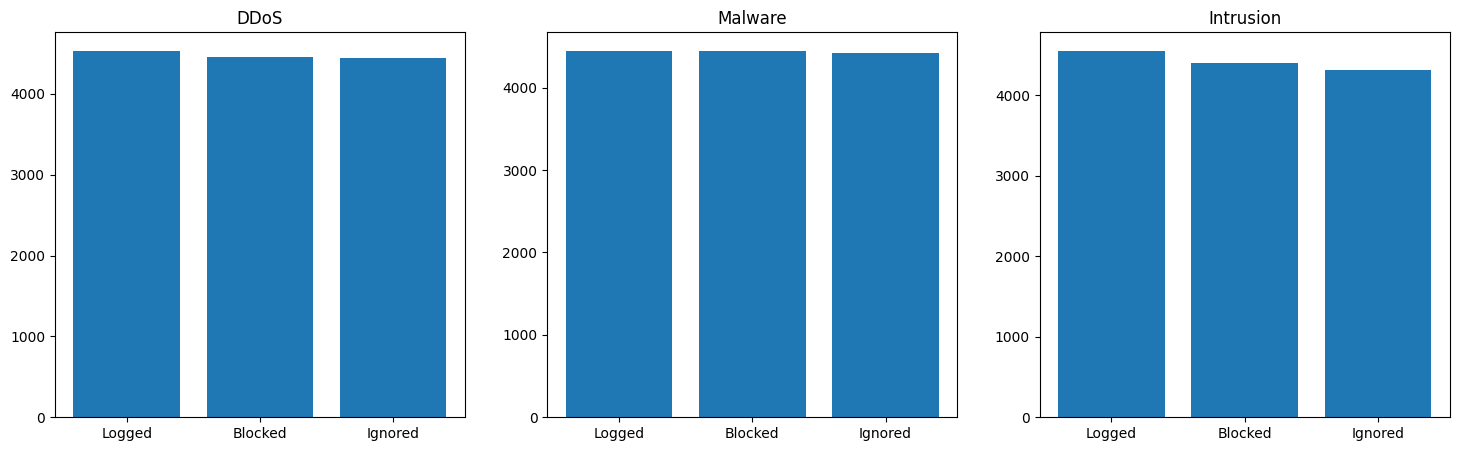

In [27]:
fig, ax = plt.subplots(1,3, figsize=(18,5))

bar_container = ax[0].bar(df["Action Taken"].unique(), df["Action Taken"].loc[df["Attack Type"]=="DDoS"].value_counts())
bar_container = ax[1].bar(df["Action Taken"].unique(), df["Action Taken"].loc[df["Attack Type"]=="Malware"].value_counts())
bar_container = ax[2].bar(df["Action Taken"].unique(), df["Action Taken"].loc[df["Attack Type"]=="Intrusion"].value_counts())

ax[0].set_title("DDoS")
ax[1].set_title("Malware")
ax[2].set_title("Intrusion")

In [ ]:
df["Attack Type"].value_counts()

#### Inspect alerts triggered by attack type

In [8]:
#tabulate the alerts triggered for each attack type
print(f"number of alerts triggered for each attack type:"
      f" DDoS: {df["Alerts/Warnings"].loc[df["Attack Type"]=="DDoS"].count()} for {len(df[df["Attack Type"]=="DDoS"])} attacks," 
      f" Malware: {df["Alerts/Warnings"].loc[df["Attack Type"]=="Malware"].count()} for {len(df[df["Attack Type"]=="Malware"])} attacks," 
      f" Intrusion: {df["Alerts/Warnings"].loc[df["Attack Type"]=="Intrusion"].count()} for {len(df[df["Attack Type"]=="Intrusion"])} attacks")

number of alerts triggered for each attack type: DDoS: 6673 for 13428 attacks, Malware: 6735 for 13307 attacks, Intrusion: 6525 for 13265 attacks


In [16]:
df["Action Taken"].loc[df["Alerts/Warnings"].isna()].count(), df["Action Taken"].count() #half of the action taken is not triggered by an alert/warning

(np.int64(20067), np.int64(40000))

#### Inspect protocol and attack type

Text(0.5, 1.0, 'Intrusion')

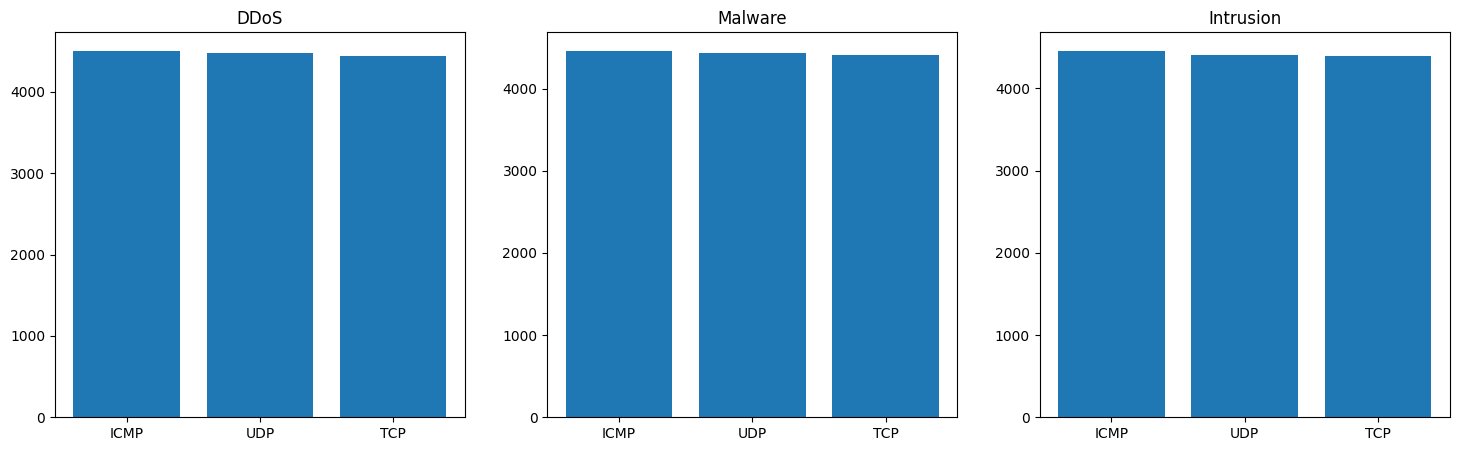

In [26]:
fig, ax = plt.subplots(1,3, figsize=(18,5))

bar_container = ax[0].bar(df["Protocol"].unique(), df["Protocol"].loc[df["Attack Type"]=="DDoS"].value_counts())
bar_container = ax[1].bar(df["Protocol"].unique(), df["Protocol"].loc[df["Attack Type"]=="Malware"].value_counts())
bar_container = ax[2].bar(df["Protocol"].unique(), df["Protocol"].loc[df["Attack Type"]=="Intrusion"].value_counts())

ax[0].set_title("DDoS")
ax[1].set_title("Malware")
ax[2].set_title("Intrusion")

#### Inspect packets

Text(0.5, 1.0, 'packet type: Data')

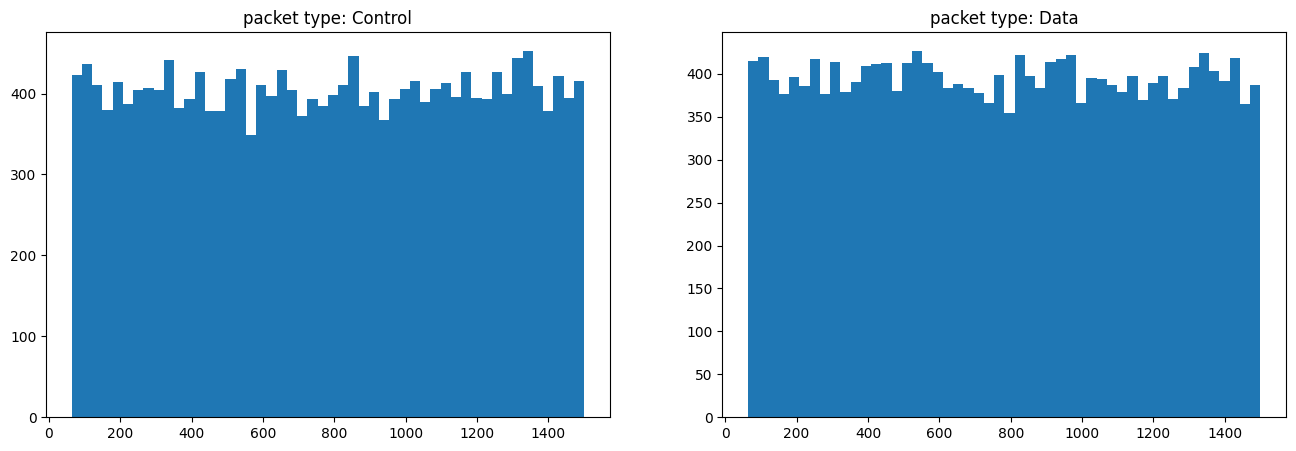

In [37]:
fig, ax = plt.subplots(1,2, figsize = (16,5))

ax[0].hist(df["Packet Length"].loc[df["Packet Type"]=="Control"], bins=50)
ax[1].hist(df["Packet Length"].loc[df["Packet Type"]=="Data"], bins=50)

ax[0].set_title("packet type: Control")
ax[1].set_title("packet type: Data")